## Linear Regression

### A regressão linear é um método fundamental em aprendizado de máquina para modelar a relação entre uma variável dependente (target) e uma ou mais variáveis independentes (features):

### 1 - **Modelo Linear** 

#### A regressão linear assume que a relação entre as variáveis ​​independentes  $$𝑋=(𝑋_1,𝑋_2,…,𝑋_𝑝)$$ e a variável dependente 𝑌 é aproximadamente linear. Matematicamente, isso pode ser expresso como: $$Y≈β_0+β_1X_1+β_2X_2+…+β_pX_p+ϵ$$ onde:

#### - $Y$ é a variável dependente (target).
#### - $X_1,X_2,…,X_p$ são as variáveis independentes (features).
#### - $β_1,β_2,…,β_p$ são os coeficientes que representam a relação entre cada feature $X_i$ e $𝑌$.
#### - $ϵ$ é o termo de erro, que captura a variação de $𝑌$ que não é explicada pelas variáveis independentes no modelo.

### 2 - **Objetivo** 

#### O objetivo da regressão linear é encontrar os valores dos coeficientes $β_1,β_2,…,β_p$ que melhor ajustam os dados observados. Isso é geralmente feito minimizando a soma dos quadrados dos resíduos (diferença entre os valores preditos pelo modelo e os valores reais de $Y$).

### 3 - **Método de Otimização** 
#### O método mais comum para estimar os coeficientes é o método dos mínimos quadrados ordinários (OLS, Ordinary Least Squares). Esse método calcula os coeficientes de tal forma que minimizam a soma dos quadrados dos resíduos: $$ \hat{\beta} = (X^T X)^{-1} X^T Y $$ onde $ \hat{\beta}$ são os coeficientes estimados, $X$ é a matriz das features (com uma coluna de 1s adicionada para o intercepto), e $Y$ é o vetor da variável dependente.



### 4 - **Avaliação do Modelo**: 
#### Após ajustar o modelo aos dados de treinamento, é crucial avaliar sua performance. Isso pode ser feito utilizando métricas como o coeficiente de determinação ($R²$), o erro quadrático médio (MSE), entre outros, dependendo do contexto específico do problema.

### 5 - **Previsões** 
#### Uma vez treinado e avaliado, o modelo pode ser usado para fazer previsões sobre novos dados, onde as variáveis independentes são conhecidas e a variável dependente é predita pelo modelo com base nos coeficientes aprendidos.

----------------------------------------------------------------------------------------------------------------------------------------------------------

### Para implementar um modelo de Regressão Linear com regularização Lasso (L1) usando scikit-learn, seguimos um procedimento semelhante ao anterior, mas ajustando os parâmetros específicos para a Regressão Linear com Lasso. A regressão linear com regularização é uma extensão da regressão linear tradicional que introduz termos adicionais na função de custo para penalizar coeficientes grandes. Isso ajuda a evitar o overfitting, onde o modelo se ajusta muito bem aos dados de treinamento, mas não generaliza bem para novos dados. Sendo de 2 tipos: Regularização L2 (Ridge Regression) e Regularização L1 (Lasso Regression).

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Carregar os dados
data = pd.read_csv('datasets/SPAECE_2018_codificado.csv')

In [3]:
data

,SEXO,IDADE,FORMACAO DA MAE,FORMACAO DO PAI,ACESSO A INTERNET,NUMERO DE COMPUTADORES,INICIOU OS ESTUDOS,CURSO O ENSINO FUNDAMENTAL,REPROVOU,ABANDONOU A ESCOLA,GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE,PROFESSORES TIRAM DUVIDAS,PROFESSORES CORRIGEM AS ATIVIDADES,TURNO ESCOLAR,NUMERO DE PONTOS EM PORTUGUES,NUMERO DE PONTOS EM MATEMATICA,PROFICIENCIA EM PORTUGUES,PROFICIENCIA EM MATEMATICA
0,1,17,1,3,0,1,3,1,0,0,2,2,2,2,11,8,252.90,285.73
1,1,18,0,3,0,1,5,1,0,0,2,3,3,2,16,9,281.74,306.30
2,1,17,0,3,0,1,5,1,0,0,3,2,2,2,8,5,224.17,243.40
3,1,17,0,3,0,1,3,3,0,0,1,1,1,2,17,6,281.61,268.13
4,2,17,0,3,0,1,5,1,0,0,2,2,2,2,18,5,301.68,240.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52489,1,17,3,1,1,2,7,2,0,1,0,1,1,4,13,7,275.88,259.11
52490,1,19,3,1,1,2,5,3,0,0,3,3,3,4,22,8,335.27,304.96
52491,2,19,3,1,1,2,5,1,0,1,3,2,1,4,22,6,334.70,251.84
52492,2,18,3,1,1,2,5,1,0,0,2,2,2,4,20,8,323.70,261.49


In [4]:
# Dividir as features e o target
features = ['SEXO', 'IDADE', 'FORMACAO DA MAE', 'FORMACAO DO PAI', 'ACESSO A INTERNET', 
            'NUMERO DE COMPUTADORES', 'INICIOU OS ESTUDOS', 'CURSO O ENSINO FUNDAMENTAL', 
            'REPROVOU', 'ABANDONOU A ESCOLA', 'GESTAO ESCOLAR / PROFESSORES TRABALHAM COM FOCO NO SPAECE', 
            'PROFESSORES TIRAM DUVIDAS', 'PROFESSORES CORRIGEM AS ATIVIDADES', 'TURNO ESCOLAR', 
            'NUMERO DE PONTOS EM PORTUGUES','PROFICIENCIA EM PORTUGUES']

# Retirado 'NUMERO DE PONTOS EM MATEMATICA' por conta do viés com a coluna target 

X = data[features]
y = data['PROFICIENCIA EM MATEMATICA']


In [5]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # test_size = 20% dos dados do dataset

In [6]:
# Treinar o modelo de Regressão Linear com Lasso (L1)
model = Lasso(alpha=0.0001, fit_intercept=True)
model.fit(X_train, y_train)

Lasso(alpha=0.0001)

#### Usamos Lasso do *scikit-learn* com *alpha=0.0001* para aplicar regularização Lasso (L1) e *fit_intercept=True* indica que queremos ajustar o intercepto do modelo.

In [7]:
# Fazer previsões
y_pred = model.predict(X_test)

In [8]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

#### Calculamos as mesmas métricas de avaliação: MSE, RMSE, MAE, MAPE e R².

In [9]:
# Exibir as métricas
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 1824.205383260552
Root Mean Squared Error (RMSE): 42.71071742853955
Mean Absolute Error (MAE): 33.80605170536731
Mean Absolute Percentage Error (MAPE): 12.443085977451135
R² Score: 0.3456834842499298


In [10]:
# Ajustar uma linha de regressão linear simples para os dados previstos vs reais
regressor = LinearRegression()
regressor.fit(y_test.values.reshape(-1, 1), y_pred)

LinearRegression()

In [11]:
# Coeficientes da linha de regressão
slope = regressor.coef_[0]
intercept = regressor.intercept_

In [12]:
# Gerar pontos para a linha de regressão
x_line = np.linspace(y_test.min(), y_test.max(), 100)
y_line = slope * x_line + intercept

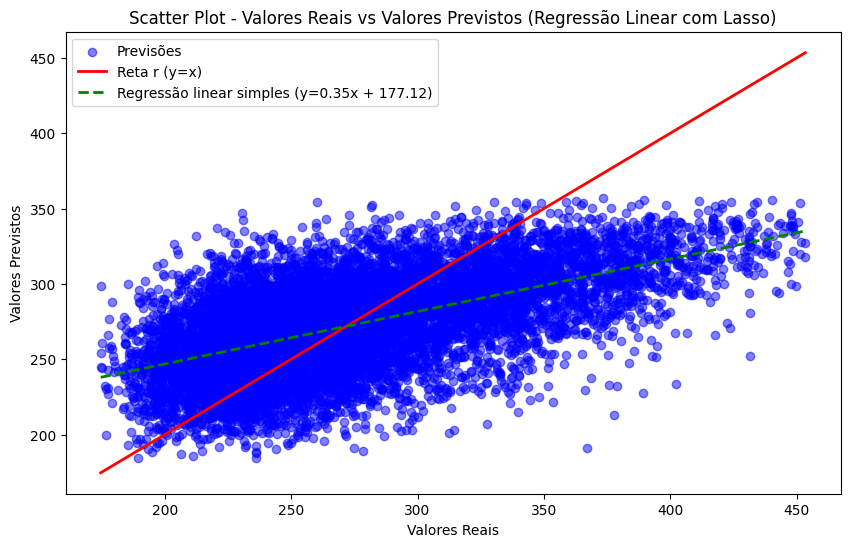

In [13]:
# Gráfico Scatter Plot Valores Reais x Valores Previstos com a reta r
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Reta r (y=x)')
plt.plot(x_line, y_line, color='green', lw=2, linestyle='--', label=f'Regressão linear simples (y={slope:.2f}x + {intercept:.2f})')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Scatter Plot - Valores Reais vs Valores Previstos (Regressão Linear com Lasso)')
plt.legend()
plt.show()

#### O gráfico resultante mostra tanto os pontos de dados quanto as linhas de perfeita correspondência e de regressão linear simples.

--------------------------------------------------------------------------------------------------------------------------------------------------------